In [ ]:
# !sudo add-apt-repository ppa:alessandro-strada/ppa
# !sudo apt-get update
# !sudo apt-get install google-drive


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# !gsutil -m cp -r . gs://mindsee-preproc-data-2/subj01

In [4]:

import pandas as pd
import numpy as np
from tensorflow.keras import Sequential, layers, models
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from tensorflow.keras.callbacks import EarlyStopping
import h5py as h5
import matplotlib.pyplot as plt

2023-06-13 02:15:01.590088: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 02:15:01.983905: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-13 02:15:02.836898: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-13 02:15:02.836987: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [3]:
y_df = pd.read_csv("drive/MyDrive/data/y_dataframe.csv")

<ipython-input-3-e2814d5b10cd>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  y_df = pd.read_csv("drive/MyDrive/data/y_dataframe.csv")


In [4]:
y_train = y_df.iloc[:8859, 1:].to_numpy()

In [5]:
y_df

,Unnamed: 0,1950s,1970,1971,2009,4-way,abandon,about,above,abraham,...,yogurt,york,you,young,younger,youth,zebra,zip,zombie,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,X_test_id_977,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9837,X_test_id_978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9838,X_test_id_979,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9839,X_test_id_980,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_df.drop(columns = ["Unnamed: 0"], inplace = True)

In [7]:
X_train = np.load("drive/MyDrive/data/nsd_train_fmriavg_nsdgeneral_sub1.npy")

In [ ]:
# from sklearn.preprocessing import RobustScaler

In [8]:
scaler = RobustScaler()

In [9]:
X_scaled = scaler.fit_transform(X_train)

In [ ]:
# from tensorflow.keras import Sequential
# from tensorflow.keras import layers

In [10]:
model_mark = Sequential([layers.Dense(100, input_shape = (15724,), activation = "relu"),
                  layers.Dense(100, activation = "relu"),
                    layers.Dropout(0.5),
                  layers.Dense(200, activation = "relu"),
                    layers.Dropout(0.5),
                  layers.Dense(500, activation = "relu"),
                    layers.Dropout(0.5),
                    layers.Dense(500, activation = "relu"),
                    layers.Dropout(0.5),
                    layers.Dense(1000, activation = "relu"),
                    layers.Dropout(0.5),
                    layers.Dense(2000, activation = "relu"),
                  layers.Dense(2637, activation = "sigmoid")])

In [11]:
model_mark.compile(loss = "binary_crossentropy", optimizer = "adam")

In [ ]:
pwd

'/content'

In [12]:
model_mark.fit(X_scaled, y_train, validation_split=0.1, batch_size = 32, epochs = 30)

Epoch 1/30
120/250 [=============>................] - ETA: 27s - loss: 0.0291

KeyboardInterrupt: ignored

In [ ]:
# es = EarlyStopping(patience=30,restore_best_weights = True)

# history = model_mark.fit(X_scaled, y_train, validation_split=0.1, batch_size = 32, epochs = 100, callbacks=[es])

Epoch 1/100
250/250 [==============================] - 7s 11ms/step - loss: 0.0222 - val_loss: 0.0092
Epoch 2/100
250/250 [==============================] - 2s 7ms/step - loss: 0.0089 - val_loss: 0.0088
Epoch 3/100
250/250 [==============================] - 2s 7ms/step - loss: 0.0087 - val_loss: 0.0089
Epoch 4/100
250/250 [==============================] - 2s 7ms/step - loss: 0.0087 - val_loss: 0.0088
Epoch 5/100
250/250 [==============================] - 2s 7ms/step - loss: 0.0087 - val_loss: 0.0088
Epoch 6/100
250/250 [==============================] - 2s 7ms/step - loss: 0.0086 - val_loss: 0.0087
Epoch 7/100
250/250 [==============================] - 2s 8ms/step - loss: 0.0086 - val_loss: 0.0088
Epoch 8/100
250/250 [==============================] - 2s 10ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 9/100
250/250 [==============================] - 2s 8ms/step - loss: 0.0082 - val_loss: 0.0084
Epoch 10/100
250/250 [==============================] - 2s 7ms/step - loss: 0.0080 - val_

In [ ]:
X_test = np.load("drive/MyDrive/data/nsd_test_fmriavg_nsdgeneral_sub1.npy")

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
labels = y_df.columns

In [ ]:
labels

Index(['1950s', '1970', '1971', '2009', '4-way', 'abandon', 'about', 'above',
       'abraham', 'abstract',
       ...
       'yogurt', 'york', 'you', 'young', 'younger', 'youth', 'zebra', 'zip',
       'zombie', 'zoo'],
      dtype='object', length=2637)

In [ ]:
# test_answer = model.predict(X_test_scaled[1].reshape(1,-1))

1/1 [==============================] - 0s 21ms/step


In [ ]:
# test_answer

array([[2.17522811e-05, 3.84352734e-06, 1.19022425e-05, ...,
        8.07502001e-05, 3.11572803e-05, 1.03687274e-03]], dtype=float32)

In [ ]:
# test_answer[test_answer>0.4]

array([], dtype=float32)

In [ ]:
# test_answer_idxs = np.argpartition(test_answer[0],-4)[-4:]

In [ ]:
# labels[test_answer_idxs]

Index(['build', 'park', 'truck', 'clock'], dtype='object')

In [ ]:
images_file = h5.File("drive/MyDrive/data/selected_test_images.hdf5", "r")
stim_list_test=np.load('drive/MyDrive/data/nsd_test_stim_list1.npy')
stim_list_train=np.load('drive/MyDrive/data/subj01_nsd_train_stim_list1.npy')
# train_caps=np.load('drive/MyDrive/data/nsd_train_cap_sub1.npy')
test_caps=np.load('drive/MyDrive/data/nsd_test_cap_sub1.npy')
X_test_dataframe = pd.read_csv('drive/MyDrive/data/df_test.csv')


In [ ]:
df_test_idx_caps=X_test_dataframe[['Image_index', 'test_caps_processed']]

In [ ]:
#idx=700
#test_answer = model.predict(X_test_scaled[idx].reshape(1,-1))
#test_answer_idxs = np.argpartition(test_answer[0],-4)[-4:]
# labels[test_answer_idxs]

1/1 [==============================] - 0s 112ms/step


In [6]:
pwd

'/home/nik/code/nik-bond/MindSee/notebooks'

In [7]:
model1 = models.load_model('../model/models/my_model_1')

2023-06-13 02:16:27.921584: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-13 02:16:28.071053: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-06-13 02:16:28.071070: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-06-13 02:16:28.072094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (o

TypeError: VariableSpec.__init__() takes from 2 to 4 positional arguments but 5 were given

1/1 [==============================] - 0s 17ms/step


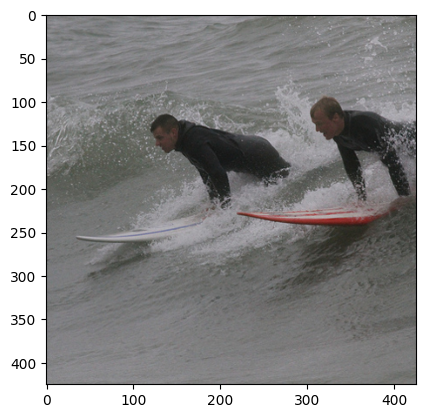

Original captions ['a couple of men are laying on surfboards in the water' '' '' ''
 'A couple of people on surfboards in the water.']
Test captions processed: ['surfboard', 'water', 'people', ' ']
Predicted labels ['skateboard', 'wave', 'ski', 'man']


In [ ]:
idx=921
test_answer = model1.predict(X_test_scaled[idx].reshape(1,-1))
test_answer_idxs = np.argpartition(test_answer[0],-4)[-4:]
test_index=stim_list_test[idx]
caps=df_test_idx_caps.loc[df_test_idx_caps['Image_index'] == test_index, 'test_caps_processed'].item()
plt.imshow(images_file[str(test_index)])
plt.show()
print('Original captions', test_caps[idx])
print('Test captions processed:' , caps)
#print('fMRI array', X_test[idx])
print('Predicted labels', list(labels[test_answer_idxs]))

In [ ]:
# import pickle 
# with open('drive/MyDrive/data/mark_basic_model.pkl', 'wb') as file:
#     pickle.dump(model, file)

In [ ]:
X_test_dataframe

,Image_index,test_caps_processed,fMRI
0,46002,"['cow', 'white', 'grass', 'eat']",[-339.66665649 -236.66667175 13.66666698 ......
1,48617,"['airplane', 'port', 'cloud', 'plane']",[ 277.5 -418. 14.5 ... 122. 436.5 461. ]
2,44980,"['airplane', 'sky', 'build', 'sunset']",[ 69. 177. -49.66666794 ... 28...
3,32625,"['kitchen', 'view', 'middle', 'day']",[ 366.66665649 -412. 42.33333206 ......
4,53052,"['clock', 'center', 'tile', 'star']",[ -49.33333206 -321.66665649 31.33333397 ......
...,...,...,...
977,19672,"['snowy', 'slope', 'ski', 'people']",[878.66668701 259.66665649 51. ... 15...
978,18535,"['giraffe', 'small', 'green', ' ']",[ 531. 104. -336.5 ... -442. 161. 516. ]
979,21318,"['dog', 'lie', 'inside', 'purple']",[255.66667175 -48.66666794 -91.66666412 ... 12...
980,32857,"['ski', 'snowboard', 'man', ' ']",[1133. 331. 385. ... 1360. 1168. 1095.]


In [ ]:
# models.save_model(model, 'drive/MyDrive/my_model_1')